# Finding the emittance of the muon

The expression we found for the emittance of the muon was $$ <J_{x_{\mu}}> = \frac{1}{2} \left(\gamma_{\mu} \beta_p\varepsilon_p - 2\alpha_\mu\alpha_p\varepsilon_p + \beta_{x_\mu}\left(\frac{\alpha_p^2+1}{\beta_p}\varepsilon_p + \delta^2 \right)\right)$$

From the previous calculations we already have the optical parameters. The inputs of the problem are $\delta$ and $\varepsilon_p$

We are going to vary some of the parameters to find the best achievable emittance of the muons.

In [1]:
%matplotlib notebook 
# allows to move around in 3D figures
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math as m
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter, LogLocator

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams.update({'font.size': 20})


plt.rcParams["figure.figsize"] = (10,6) # to ge bigger figures

In [2]:
v_c = 299792458 ; # speed of light in m/s
E_e = 45 ; # energy of the positron in GeV
E_mu = 22 ; # energy of the muon in GeV

q_e = 1; #charge of a positron in units of an electron charge
q_mu = 1; #charge of a muon in units of an electron charge

m_e = 0.511*10**(-3); # mass of the positron in GeV/c^2
m_mu = 0.10565; # mass of the muon in GeV/c^2

g_mu = E_mu/(m_mu); # approximately 225

dB = 575; # from 550 T/m to 610 T/m TO BE SET
L_q = 0.3 # given length of the quadrupole
s_energy = 0.230**2; # s the square of the energy in the center of mass frame
delta = 4*m_e/s_energy*(np.sqrt(s_energy/4-m_mu**2));


In [6]:
from CourantSnyder import CourantSnyder

# Study of variations
### Modifying $\varepsilon_p$

Let's first see if varying the original emittance of the incoming positrons can be an important parameter. In the paper that inspired this TP IV, the emittance of the positron beam is $\epsilon_p  = 5.73\cdot10^{- 9}$ m. We are going to evaluate the mean over the whole length of a FODO cell with a range of four orders of magnitude for the positrons ($10^{-8}$ to $10^{-11}$m)


In [7]:
#Positron
P_e = np.sqrt(E_e**2 - m_e**2); # canonical momentum of the positron in GeV/c at the entrance
k_1e = q_e/(P_e*10**9/v_c)*dB  # k_1 in a 
f = 1/(k_1e*L_q); # focal of this particle
L_e = 1.999*f
print(f)
#muon
P_mu = P_e/2; # half because both of the particles have the same masses
k_1mu = q_mu/(P_mu*10**9/v_c)*dB  # k_1 in a quadrupole
f_mu = 1/(k_1mu*L_q); # focal of this particle
L_mu = 1.999*f_mu

L = min([L_e,L_mu])
#dividing the FODO cell
size = 50
s = np.linspace(0,L,size);
epsilon_e = np.linspace(10**(-11),10**(-8),num=2*size)
FODO_length = np.linspace(0,2*L,2*size)


#Get the courant snyder parameters of the positron
beta_e, alpha_e, gamma_e = CourantSnyder(f, L, s)
#Get the courant snyder parameters of the muon positive
beta_mu, alpha_mu, gamma_mu = CourantSnyder(f_mu, L, s)
#Get the courant snyder parameters of the muon positive
beta_mum, alpha_mum, gamma_mum = CourantSnyder(-f_mu, L, s)


epsilon_muA = np.zeros((2*size,2*size))
espilon_muA_mean = np.zeros(2*size)
epsilon_mumA = np.zeros((2*size,2*size))
espilon_mumA_mean = np.zeros(2*size)

for i in range(2*size) : #along s
    for j in range(2*size) : #along the values of epsilon_e
        epsilon_muA[i,j] = 1/2*(gamma_mu[i]*beta_e[i]*epsilon_e[j] - 2*alpha_mu[i]*alpha_e[i]*epsilon_e[j] + 
                               beta_mu[i]*((alpha_e[i]**2+1)/beta_e[i]*epsilon_e[j] + delta**2))
        epsilon_mumA[i,j] = 1/2*(gamma_mum[i]*beta_e[i]*epsilon_e[j] - 2*alpha_mum[i]*alpha_e[i]*epsilon_e[j] + 
                               beta_mum[i]*((alpha_e[i]**2+1)/beta_e[i]*epsilon_e[j] + delta**2))
for j in range(2*size) : #along the values of s
    espilon_muA_mean[j] = np.mean(epsilon_muA[:,j])
    espilon_mumA_mean[j] = np.mean(epsilon_mumA[:,j])


0.8701672048086412


<IPython.core.display.Javascript object>


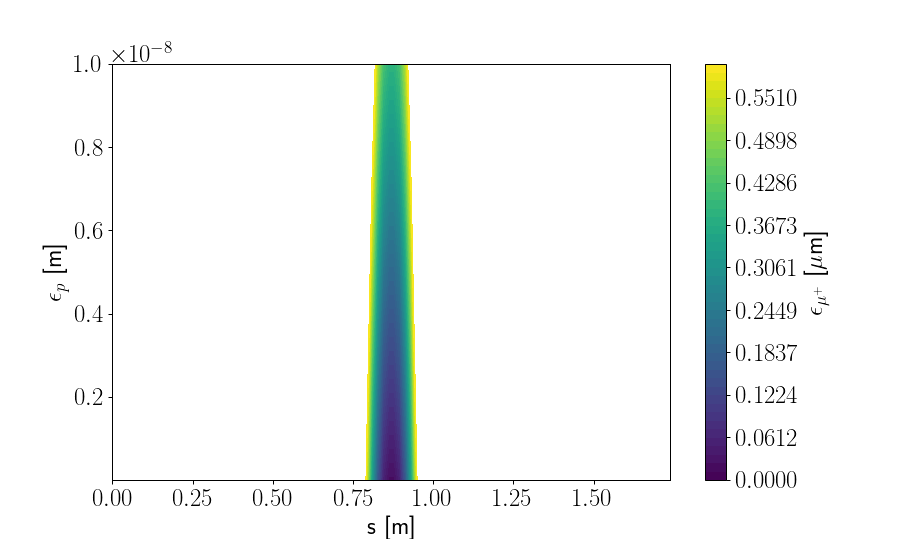

<IPython.core.display.Javascript object>


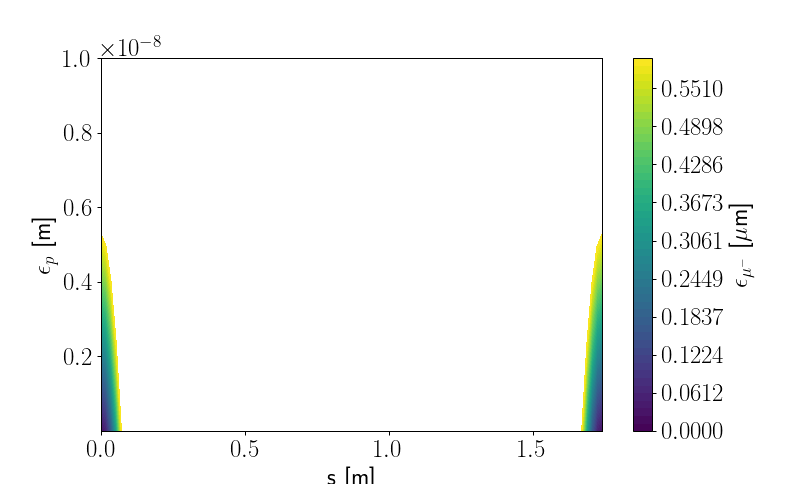

<IPython.core.display.Javascript object>


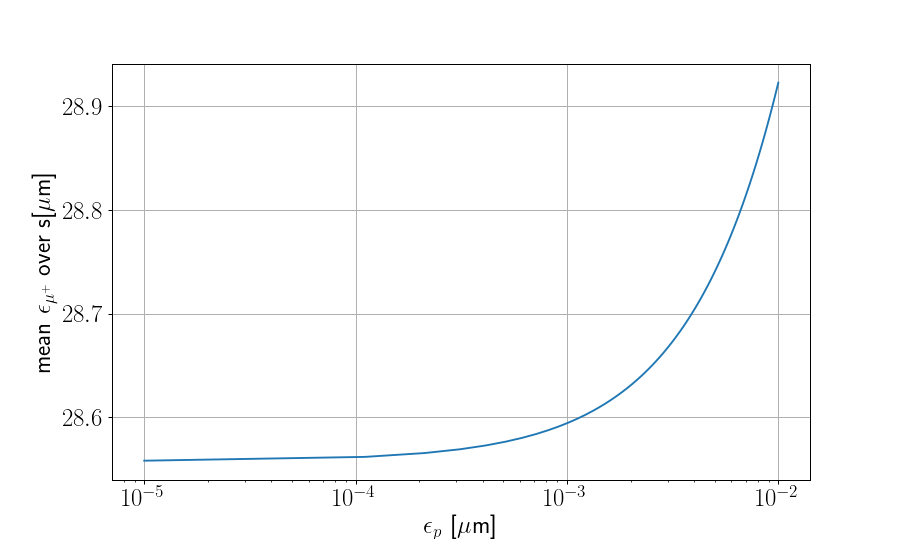

<IPython.core.display.Javascript object>


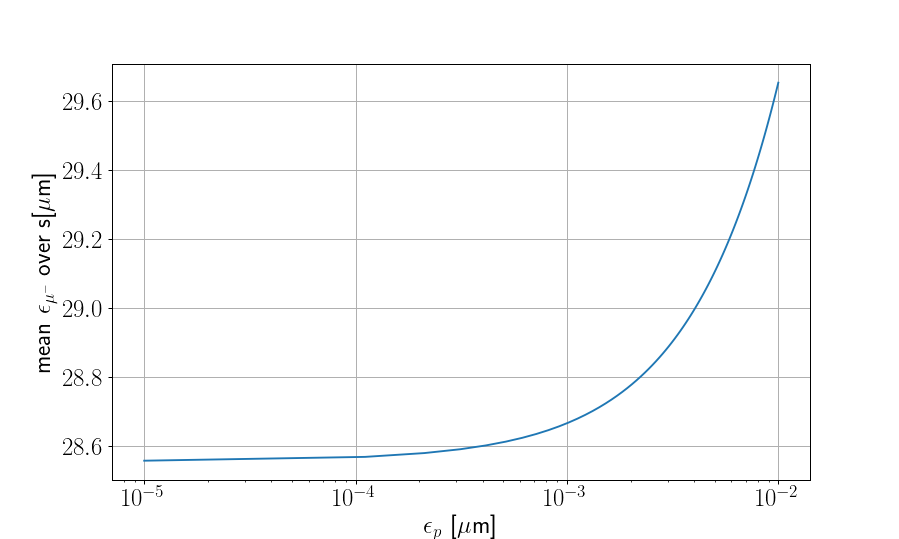

<IPython.core.display.Javascript object>


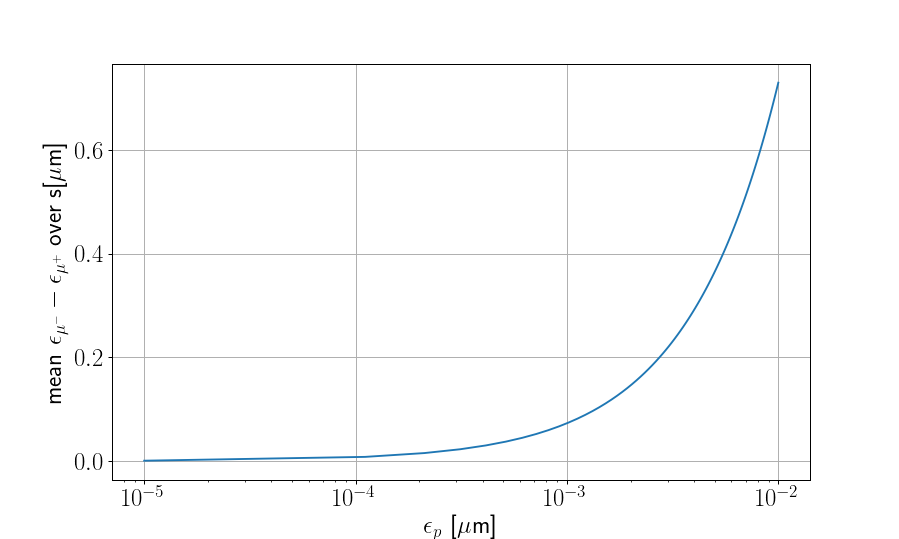

In [8]:
(x, y) = np.meshgrid(FODO_length, epsilon_e)
Fig = plt.figure(1)
plt.contourf(x,y,np.transpose(epsilon_muA*10**6), levels = np.linspace(0,0.6));
plt.colorbar( label =r'$\epsilon_{\mu^+}$ [$\mu$m]')
plt.xlabel(r's [m]')
plt.ylabel(r'$\epsilon_p$ [m]')
Fig.savefig("vary_ep_mup.eps")

(x, y) = np.meshgrid(FODO_length, epsilon_e)
Fig = plt.figure(12)
plt.contourf(x,y,np.transpose(epsilon_mumA*10**6), levels = np.linspace(0,0.6));
plt.colorbar( label =r'$\epsilon_{\mu^-}$ [$\mu$m]')
plt.xlabel(r's [m]')
plt.ylabel(r'$\epsilon_p$ [m]')
Fig.savefig("vary_ep_mum.eps")

# fig = plt.figure(1)
# ax = fig.add_subplot(111, projection='3d')
# surf = ax.plot_surface(x, y, epsilon_muA, cmap=plt.cm.jet)

fig = plt.figure(13)
plt.xscale('log')
plt.plot(epsilon_e*10**6, espilon_muA_mean*10**6)
plt.xlabel(r'$\epsilon_p$ [$\mu$m]')
plt.ylabel(r'mean $\epsilon_{\mu^+}$ over s[$\mu$m]')
plt.grid()
Fig.savefig("vary_ep_mup_mean.eps")


fig = plt.figure(14)
plt.xscale('log')
plt.plot(epsilon_e*10**6, espilon_mumA_mean*10**6)
plt.xlabel(r'$\epsilon_p$ [$\mu$m]')
plt.ylabel(r'mean $\epsilon_{\mu^-}$ over s[$\mu$m]')
plt.grid()
Fig.savefig("vary_ep_mum_mean.eps")


fig = plt.figure(15)
plt.xscale('log')
plt.plot(epsilon_e*10**6, (espilon_mumA_mean-espilon_muA_mean)*10**6)
plt.xlabel(r'$\epsilon_p$ [$\mu$m]')
plt.ylabel(r'mean $\epsilon_{\mu^-}-\epsilon_{\mu^+}$ over s[$\mu$m]')
plt.grid()
Fig.savefig("vary_ep_diff_mean.eps")




As we can see on the last graph, the rate of change of the emittance of the muons becomes insignificantly small when are getting closer to 0. Thus, reducing the emittance of the positrons is not an efficient way to minimise the emittance of the muons.  priority 

### Modifying $\frac{dB}{dx}$

Another parameter that could be interesting is the gradient of magnetic field in the quadrupoles of the FODO cell. Here we are going to keep the emittance of the positrons at the value given by the paper and we are going to vary the gradient on several orders of magnitude.

In [188]:
size = 10

epsilon_e  = 5.73*10**(- 9) # emittance of the positron beam from the paper (in meters)
epsilon_muB = np.zeros((2*size, 2*size))
epsilon_mumB = np.zeros((2*size, 2*size))
dB = np.linspace(100,8000,num = 2*size)

for j in range(2*size) : # variation of dB
     #Positron
    P_e = np.sqrt(E_e**2 - m_e**2); # canonical momentum of the positron in GeV/c at the entrance
    k_1e = q_e/(P_e*10**9/v_c)*dB[j]
    f = 1/(k_1e*L_q); # focal of this particle
    L_e = 1.999*f
    #muon
    P_mu = P_e/2; # half because both of the particles have the same masses
    k_1mu = q_mu/(P_mu*10**9/v_c)*dB[j]  # k_1 in a quadrupole
    f_mu = 1/(k_1mu*L_q); # focal of this particle
    L_mu = 1.999*f_mu
    
    L = min([L_e,L_mu])
    
    s = np.linspace(0,L,size);
    FODO_length = np.linspace(0,2*L,2*size)
    
    #Get the courant snyder parameters of the positron
    beta_e, alpha_e, gamma_e = CourantSnyder(f, L, s)
    #Get the courant snyder parameters of the muon positive
    beta_mu, alpha_mu, gamma_mu = CourantSnyder(f_mu, L, s)
    #Get the courant snyder parameters of the muon positive
    beta_mum, alpha_mum, gamma_mum = CourantSnyder(-f_mu, L, s)
    for i in range(2*size) :
            epsilon_muB[i,j] = 1/2*(gamma_mu[i]*beta_e[i]*epsilon_e - 2*alpha_mu[i]*alpha_e[i]*epsilon_e + 
                               beta_mu[i]*((alpha_e[i]**2+1)/beta_e[i]*epsilon_e + delta**2));
            epsilon_mumB[i,j] = 1/2*(gamma_mum[i]*beta_e[i]*epsilon_e - 2*alpha_mum[i]*alpha_e[i]*epsilon_e + 
                               beta_mum[i]*((alpha_e[i]**2+1)/beta_e[i]*epsilon_e + delta**2));
            
espilon_muB_mean = np.zeros(2*size)
espilon_mumB_mean = np.zeros(2*size)

for j in range(2*size) : #along the values of s
    espilon_muB_mean[j] = np.mean(epsilon_muB[:,j])
    espilon_mumB_mean[j] = np.mean(epsilon_mumB[:,j])



<ipython-input-180-f5bdadbf2f3c>:21: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tr= np.asscalar(Ry.trace());


<IPython.core.display.Javascript object>


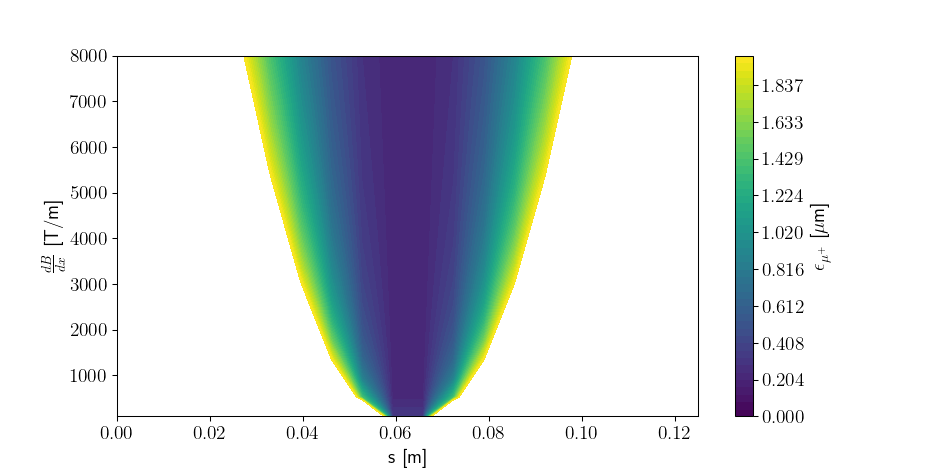

<IPython.core.display.Javascript object>


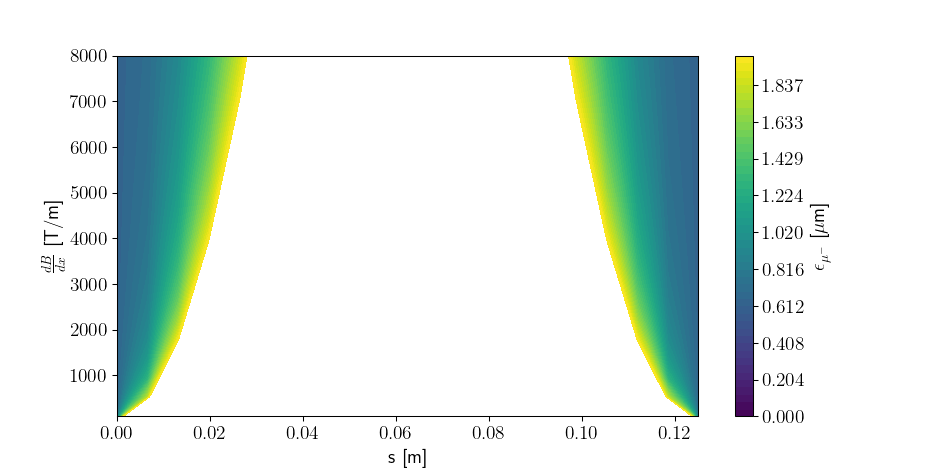

<IPython.core.display.Javascript object>


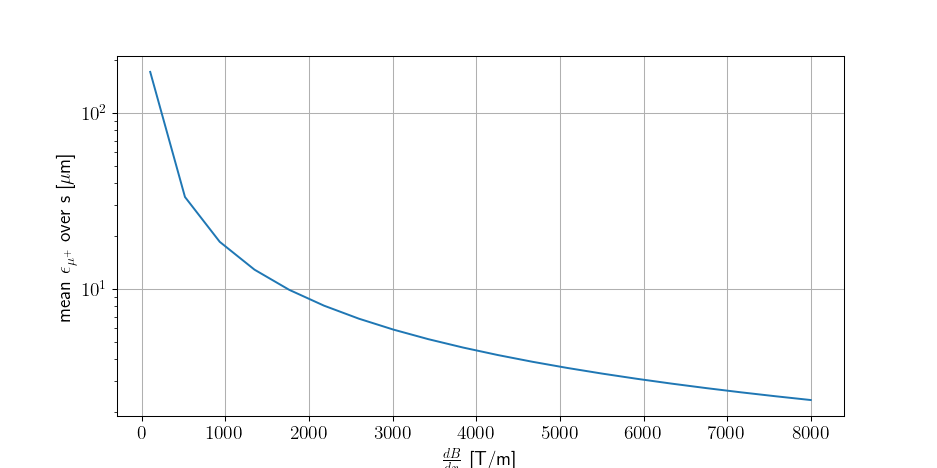

<IPython.core.display.Javascript object>


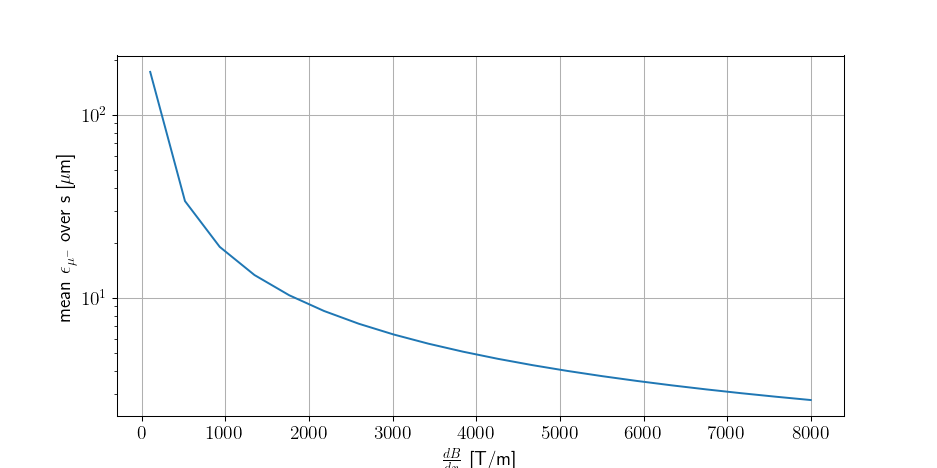

In [191]:
(x, y) = np.meshgrid(FODO_length, dB)
fig = plt.figure(21)
plt.contourf(x,y,np.transpose(epsilon_muB*10**6),levels = np.linspace(0,2));
plt.colorbar( label =r'$\epsilon_{\mu^+}$ [$\mu$m]')
plt.xlabel(r's [m]')
plt.ylabel(r'$\frac{dB}{dx}$ [T/m]')

(x, y) = np.meshgrid(FODO_length, dB)
fig = plt.figure(22)
plt.contourf(x,y,np.transpose(epsilon_mumB*10**6),levels = np.linspace(0,2));
plt.colorbar( label =r'$\epsilon_{\mu^-}$ [$\mu$m]')
plt.xlabel(r's [m]')
plt.ylabel(r'$\frac{dB}{dx}$ [T/m]')

# fig = plt.figure(4)
# ax = fig.add_subplot(111, projection='3d')
# surf = ax.plot_surface(x, y, epsilon_muB, cmap=plt.cm.jet)

fig = plt.figure(23)
plt.yscale('log')
plt.plot(dB, espilon_muB_mean*10**6)
plt.xlabel(r'$\frac{dB}{dx}$ [T/m]')
plt.ylabel(r'mean $\epsilon_{\mu^+}$ over s [$\mu$m]')
plt.grid()
Fig.savefig("vary_dB_mup.eps")


fig = plt.figure(24)
plt.yscale('log')
plt.plot(dB, espilon_mumB_mean*10**6)
plt.xlabel(r'$\frac{dB}{dx}$ [T/m]')
plt.ylabel(r'mean $\epsilon_{\mu^-}$ over s [$\mu$m]')
plt.grid()
Fig.savefig("vary_dB_mum.eps")


Contrary to the positron emittance, we can already see that by multiplying the gradient by 5 (original gradient in the paper is = $575$ T/m) for a quadrupole length of >300mm , we can change the order of magntiude. However, we can see that the rate of decrease diminishes for higher gradients, which indicates that trying to reach higher gradients won't have a significant impact on the emittance of the muons. 

### Modifying $L_q$ 

A last parameter that we can take into account is the drift length (i.e. half the length of a FODO cell length in the approximation of thin lenses). The latest and most performant quadrupoles QD0 from CLIC should have a length longer than 300 mm (CERN-ATS-2012-200, Design, Assembly and First Measurements of a short Model for CLIC Final Focus Hybrid Quadrupole QD0

In [192]:
from math import nan
size = 30

P_e = np.sqrt(E_e**2 - m_e**2); # canonical momentum of the positron in GeV/c at the entrance
P_mu = P_e/2; # half because both of the particles have the same masses

epsilon_e  = 5.73*10**(-9) # emittance of the positron beam from the paper (in meters)
dB = 575
k_1e = q_e/(P_e*10**9/v_c)*dB
k_1mu = q_mu/(P_mu*10**9/v_c)*dB  # k_1 in a quadrupole
L_q = np.linspace(0.01,0.4,num=2*size) # vary magnet length 
L = np.zeros(2*size) # vary drift length + quad length

f_e = np.zeros(2*size) # will store the values of f calculated with different B
f_mu = np.zeros(2*size)# will store the values of f calculated with different B

epsilon_mu = np.zeros((2*size, 2*size))
epsilon_mu_mean = np.zeros(2*size)
epsilon_mum = np.zeros((2*size, 2*size))
epsilon_mum_mean = np.zeros(2*size)

for j in range(2*size) : # variation of L_q 
        #Positron
        f_e[j] = 1/(k_1e*L_q[j]); # focal of this particle
        L_e_max = 1.999*f_e[j]

        #muon
        f_mu[j] = 1/(k_1mu*L_q[j]); # focal of this particle
        L_mu_max = 1.999*f_mu[j]
        L[j] = min([L_e_max,L_mu_max]) #L_mu always smaller
        # f_mu always smaller 
        if (L_q[j] > L[j]) : # condition on the maximum length of the drift space
            L[j] = nan

for j in range(2*size) : # variation of L  
        if (L[j]==nan) :
            epsilon_mu[j,:] = nan
            epsilon_mum[j,:] = nan
            pass
        else :
            s = np.linspace(0,L[j],size);
            #Get the courant snyder parameters of the positron
            beta_e, alpha_e, gamma_e = CourantSnyder(f_e[j], L[j], s)
            #Get the courant snyder parameters of the muon positive
            beta_mu, alpha_mu, gamma_mu = CourantSnyder(f_mu[j], L[j], s)
            #Get the courant snyder parameters of the muon negative
            beta_mum, alpha_mum, gamma_mum = CourantSnyder(-f_mu[j], L[j], s)

            for i in range(2*size) :# variation of s 
                    epsilon_mu[j,i] = 1/2*(gamma_mu[i]*beta_e[i]*epsilon_e - 2*alpha_mu[i]*alpha_e[i]*epsilon_e + 
                                       beta_mu[i]*((alpha_e[i]**2+1)/beta_e[i]*epsilon_e + delta**2));
                    epsilon_mum[j,i] = 1/2*(gamma_mum[i]*beta_e[i]*epsilon_e - 2*alpha_mum[i]*alpha_e[i]*epsilon_e + 
                                       beta_mum[i]*((alpha_e[i]**2+1)/beta_e[i]*epsilon_e + delta**2));  
        epsilon_mu_mean[j] = np.mean(epsilon_mu[j,:])
        epsilon_mum_mean[j] = np.mean(epsilon_mum[j,:])
  

FODO_length = np.linspace(0,2,2*size) #normalised length

                    
                    

<ipython-input-180-f5bdadbf2f3c>:21: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tr= np.asscalar(Ry.trace());


<IPython.core.display.Javascript object>


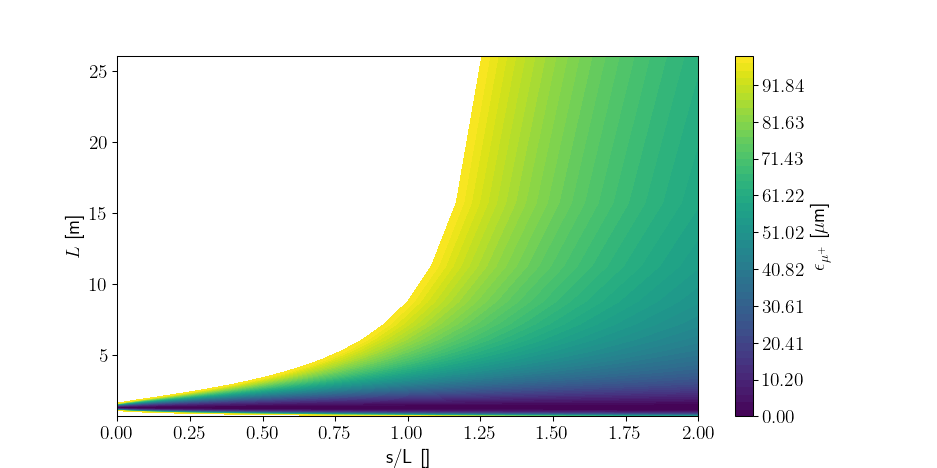

<IPython.core.display.Javascript object>


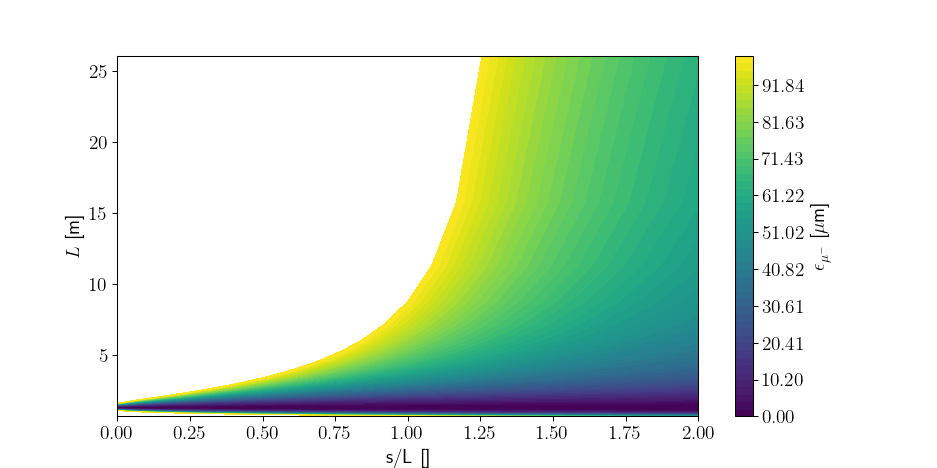

<IPython.core.display.Javascript object>


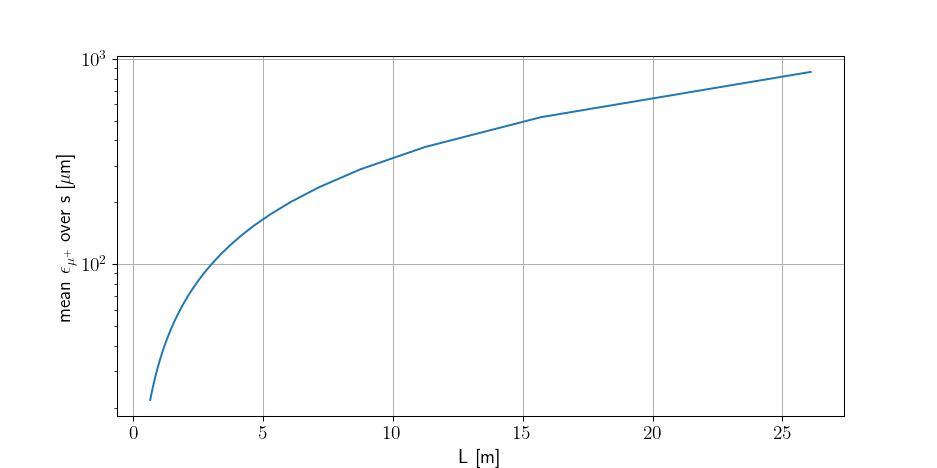

<IPython.core.display.Javascript object>


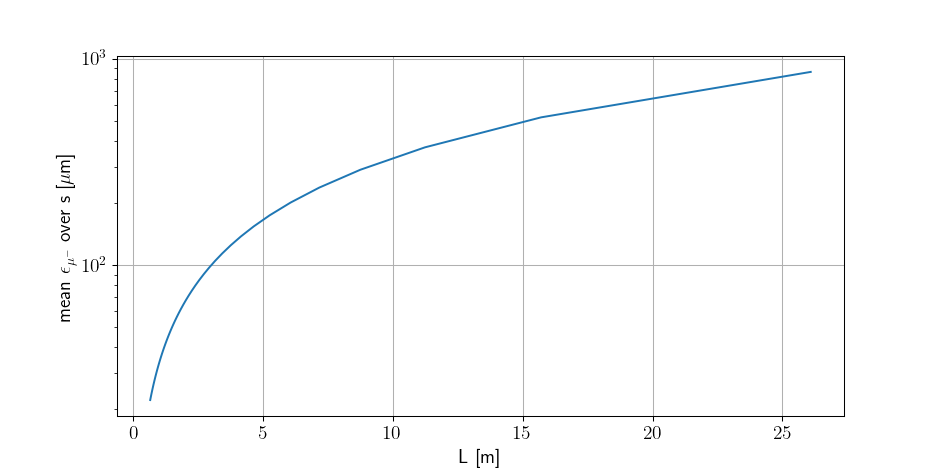

In [193]:
 (x, y) = np.meshgrid(FODO_length, L)
fig = plt.figure(31)
plt.contourf(x,y,np.transpose(epsilon_mu*10**6),levels = np.linspace(0,100));
plt.colorbar( label =r'$\epsilon_{\mu^+}$ [$\mu$m]')
plt.xlabel(r's/L []')
plt.ylabel(r'$L$ [m]')

 (x, y) = np.meshgrid(FODO_length, L)
fig = plt.figure(32)
plt.contourf(x,y,np.transpose(epsilon_mu*10**6),levels = np.linspace(0,100));
plt.colorbar( label =r'$\epsilon_{\mu^-}$ [$\mu$m]')
plt.xlabel(r's/L []')
plt.ylabel(r'$L$ [m]')

# (x, y) = np.meshgrid(np.arange(epsilon_muC.shape[0]), np.arange(epsilon_muC.shape[1]))
# fig = plt.figure(7)
# ax = fig.add_subplot(111, projection='3d')
# surf = ax.plot_surface(x, y, epsilon_muC, cmap=plt.cm.jet)

fig = plt.figure(33)
plt.yscale('log')
plt.plot(L, epsilon_mu_mean*10**6)
plt.xlabel('L [m]')
plt.ylabel(r'mean $\epsilon_{\mu^+}$ over s [$\mu$m]')
plt.grid()

ig = plt.figure(34)
plt.yscale('log')
plt.plot(L, epsilon_mum_mean*10**6)
plt.xlabel('L [m]')
plt.ylabel(r'mean $\epsilon_{\mu^-}$ over s [$\mu$m]')
plt.grid()

Here we realise that the length of the half cell (which is at least the length of the quadrupole) has a big impact on the mean emittance of the muons.

###  Varying $dB$ and $L_q$

In this first portion of code we calculate the possible length of the drift space (and thus half the size of the FODO lattice in a thin lenses approximation) when varying the gradient of magnetic field and the real length of the quadrupole. Indeed, they were the two parameters that had the most influence on the emittance of the muons


In [196]:
from math import nan
size = 30

P_e = np.sqrt(E_e**2 - m_e**2); # canonical momentum of the positron in GeV/c at the entrance
P_mu = P_e/2; # half because both of the particles have the same masses

epsilon_e  = 5.73*10**(-9) # emittance of the positron beam from the paper (in meters)
dB = np.linspace(550,800,num = 2*size)
L_q = np.linspace(0.1,2,num=2*size) # vary magnet length 
L = np.zeros((2*size,2*size)) # vary drift length + quad length

f_e = np.zeros((2*size,2*size)) # will store the values of f calculated with different B
f_mu = np.zeros((2*size,2*size))# will store the values of f calculated with different B

epsilon_mu = np.zeros((2*size, 2*size,2*size))
epsilon_mu_mean = np.zeros((2*size, 2*size))
epsilon_mum = np.zeros((2*size, 2*size,2*size))
epsilon_mum_mean = np.zeros((2*size, 2*size))

for j in range(2*size) : # variation of L_q 
    for k in range(2*size) : # variation of dB    
        #Positron
        k_1e = q_e/(P_e*10**9/v_c)*dB[k]
        f_e[j,k] = 1/(k_1e*L_q[j]); # focal of this particle
        L_e_max = 1.999*f_e[j,k]

        #muon
        k_1mu = q_mu/(P_mu*10**9/v_c)*dB[k]  # k_1 in a quadrupole
        f_mu[j,k] = 1/(k_1mu*L_q[j]); # focal of this particle
        L_mu_max = 1.999*f_mu[j,k]
        L[j,k] = min([L_e_max,L_mu_max]) #L_mu always smaller
        L_q
        # f_mu always smaller 
        if (not(L_q[j] <= L[j,k] <= 1.999*f_mu[j,k])) : # condition on the maximum length of the drift space
            L[j,k] = nan


In [197]:
for j in range(2*size) : # variation of dB    
    for k in range(2*size) : # variation of L_q 
        if (L[j,k] == nan):
            epsilon_mu_mean[j,k] = nan
            epsilon_mum_mean[j,k] = nan

            pass 
        else :
            s = np.linspace(0,L[j,k],size);
            #Get the courant snyder parameters of the positron
            beta_e, alpha_e, gamma_e = CourantSnyder(f_e[j,k], L[j,k], s)
            #Get the courant snyder parameters of the muon positive
            beta_mu, alpha_mu, gamma_mu = CourantSnyder(f_mu[j,k], L[j,k], s)
            #Get the courant snyder parameters of the muon negative
            beta_mum, alpha_mum, gamma_mum = CourantSnyder(-f_mu[j,k], L[j,k], s)
            
            for i in range(2*size) :# variation of s 
                epsilon_mu[i,j,k] = 1/2*(gamma_mu[i]*beta_e[i]*epsilon_e - 2*alpha_mu[i]*alpha_e[i]*epsilon_e + 
                                       beta_mu[i]*((alpha_e[i]**2+1)/beta_e[i]*epsilon_e + delta**2));
                epsilon_mum[i,j,k] = 1/2*(gamma_mu[i]*beta_e[i]*epsilon_e - 2*alpha_mum[i]*alpha_e[i]*epsilon_e + 
                                       beta_mum[i]*((alpha_e[i]**2+1)/beta_e[i]*epsilon_e + delta**2));
                
            epsilon_mu_mean[j,k] = np.mean(epsilon_mu[:,j,k]) # mean on the s
            epsilon_mum_mean[j,k] = np.mean(epsilon_mum[:,j,k]) # mean on the s


<ipython-input-180-f5bdadbf2f3c>:21: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tr= np.asscalar(Ry.trace());


<IPython.core.display.Javascript object>


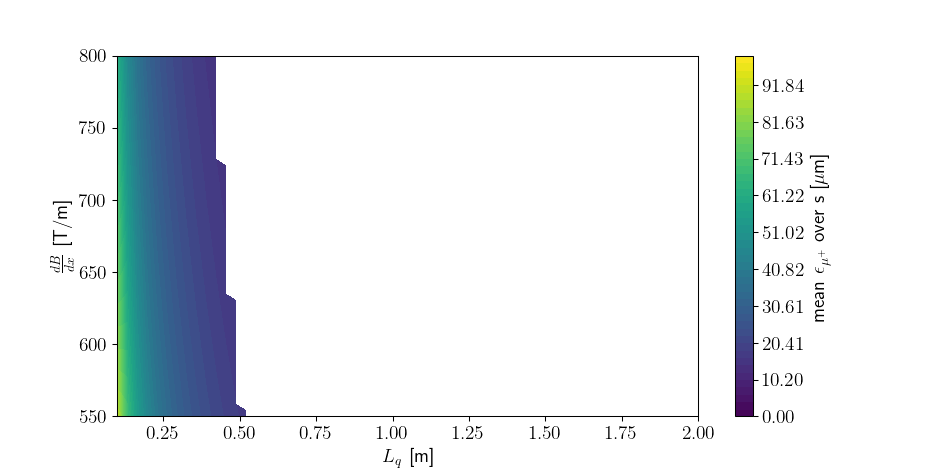

<IPython.core.display.Javascript object>


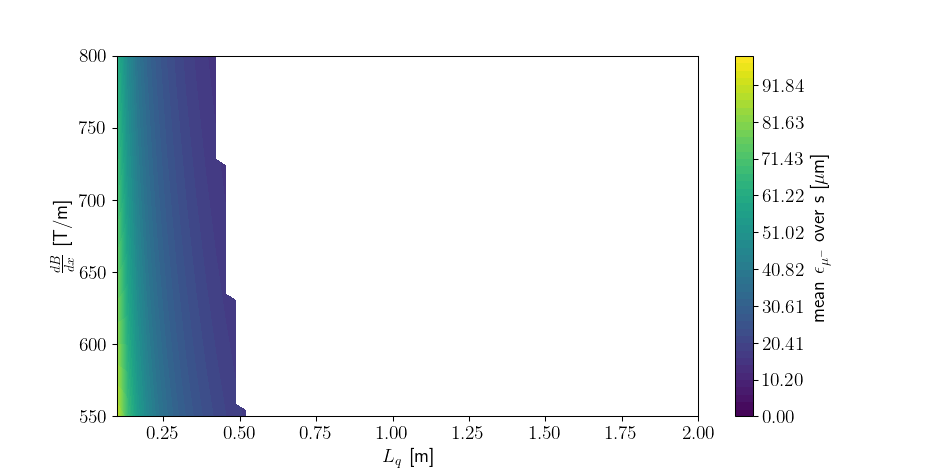

Text(0, 0.5, '$\\frac{dB}{dx}$ [T/m]')

In [198]:
(x, y) = np.meshgrid(L_q,dB)
fig = plt.figure(41)
plt.contourf(x,y,np.transpose(epsilon_mu_mean*10**6),levels = np.linspace(0,100));
plt.colorbar( label =r'mean $\epsilon_{\mu^+}$ over s [$\mu$m]')
plt.xlabel(r'$L_q$ [m]')
plt.ylabel(r'$\frac{dB}{dx}$ [T/m]')

(x, y) = np.meshgrid(L_q,dB)
fig = plt.figure(42)
plt.contourf(x,y,np.transpose(epsilon_mum_mean*10**6),levels = np.linspace(0,100));
plt.colorbar( label =r'mean $\epsilon_{\mu^-}$ over s [$\mu$m]')
plt.xlabel(r'$L_q$ [m]')
plt.ylabel(r'$\frac{dB}{dx}$ [T/m]')

 We are going to use instead the focal length which is linked to both the quadrupole length and the gradient of magnetic field 
 

In [199]:
from math import nan
size = 50

P_e = np.sqrt(E_e**2 - m_e**2); # canonical momentum of the positron in GeV/c at the entrance
P_mu = P_e/2; # half because both of the particles have the same masses
epsilon_e  = 5.73*10**(-9) # emittance of the positron beam from the paper (in meters)
f = np.linspace(10**(-5),0.01,2*size) # vary  focal length of the quadrupole, this is normalised and doesn't depend 
L = np.linspace(0,0.5,2*size) # vary drift length + quad length

dB1 = 575
L_q1 = 1/(f*dB1)
dB2 = 1000
L_q2 = 1/(f*dB2)
dB3 = 10000
L_q3 = 1/(f*dB3)
dB4 = 100000
L_q4 = 1/(f*dB4)

epsilon_mu = np.zeros((2*size, 2*size,2*size))
epsilon_mu_mean = np.zeros((2*size, 2*size))
epsilon_mum = np.zeros((2*size, 2*size,2*size))
epsilon_mum_mean = np.zeros((2*size, 2*size))

In [200]:
for j in range(2*size) : # variation of f    
    for k in range(2*size) : # variation of L
        if (not( L[k] <= 1.999*(P_mu*10**9/v_c)*f[j])):
            epsilon_mu_mean[j,k] = nan
            pass 
        else :
            s = np.linspace(0,L[k],size);
            #Get the courant snyder parameters of the positron
            beta_e, alpha_e, gamma_e = CourantSnyder((P_e*10**9/v_c)*f[j], L[k], s)
            #Get the courant snyder parameters of the muon positive
            beta_mu, alpha_mu, gamma_mu = CourantSnyder((P_mu*10**9/v_c)*f[j], L[k], s)
            #Get the courant snyder parameters of the muon negative
            beta_mum, alpha_mum, gamma_mum = CourantSnyder(-(P_mu*10**9/v_c)*f[j], L[k], s)
            
            for i in range(2*size) :# variation of s 
                epsilon_mu[i,j,k] = 1/2*(gamma_mu[i]*beta_e[i]*epsilon_e - 2*alpha_mu[i]*alpha_e[i]*epsilon_e + 
                                       beta_mu[i]*((alpha_e[i]**2+1)/beta_e[i]*epsilon_e + delta**2));
                epsilon_mum[i,j,k] = 1/2*(gamma_mum[i]*beta_e[i]*epsilon_e - 2*alpha_mum[i]*alpha_e[i]*epsilon_e + 
                                       beta_mum[i]*((alpha_e[i]**2+1)/beta_e[i]*epsilon_e + delta**2));
            epsilon_mu_mean[j,k] = np.mean(epsilon_mu[:,j,k]) # mean on the s
            epsilon_mum_mean[j,k] = np.mean(epsilon_mu[:,j,k]) # mean on the s

epsilon_mu_mean_min =  np.zeros(2*size)
epsilon_mum_mean_min =  np.zeros(2*size)
L_min = np.zeros(2*size)
f_min = np.zeros(2*size)
L_min_m = np.zeros(2*size)
f_min_m = np.zeros(2*size)

for j in range (2*size): # iteration on f
    epsilon_mu_mean_min[j] = np.nanmin(epsilon_mu_mean[:,j])
    epsilon_mum_mean_min[j] = np.nanmin(epsilon_mum_mean[:,j])
    for k in range(2*size) :
        if epsilon_mu_mean_min[j] == epsilon_mu_mean[k][j] :
#             print('yes : ',k,j)
            indices[0][j] = k
            indices[1][j] = j
            L_min[j] = L[j]
            f_min[j] = f[k]
        if epsilon_mum_mean_min[j] == epsilon_mum_mean[k][j] :
#             print('yes : ',k,j)
            indices[0][j] = k
            indices[1][j] = j
            L_min_m[j] = L[j]
            f_min_m[j] = f[k]# print('epsilon_mu_mean', epsilon_mu_mean)
# print('mn=',mn)
# print('indices',indices)

<ipython-input-180-f5bdadbf2f3c>:15: RuntimeWarning: invalid value encountered in double_scalars
  alpha_x0 = (Rx1 - Rx4)/(2*np.sin(mu_x));
<ipython-input-180-f5bdadbf2f3c>:16: RuntimeWarning: invalid value encountered in double_scalars
  beta_x0 = Rx2/np.sin(mu_x);
<ipython-input-180-f5bdadbf2f3c>:17: RuntimeWarning: invalid value encountered in double_scalars
  gamma_x0 = -Rx3/np.sin(mu_x);
<ipython-input-180-f5bdadbf2f3c>:21: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tr= np.asscalar(Ry.trace());
<ipython-input-180-f5bdadbf2f3c>:23: RuntimeWarning: invalid value encountered in double_scalars
  alpha_y0 = (Ry1 - tr/2)/np.sin(mu_y);
<ipython-input-180-f5bdadbf2f3c>:24: RuntimeWarning: invalid value encountered in double_scalars
  beta_y0 = Ry2/np.sin(mu_y);
<ipython-input-180-f5bdadbf2f3c>:25: RuntimeWarning: invalid value encountered in double_scalars
  gamma_y0 = -Ry3/np.sin(mu_y);
<ipython-input-200-5c4c1eae1daf>:31: RuntimeWarning: A

<IPython.core.display.Javascript object>


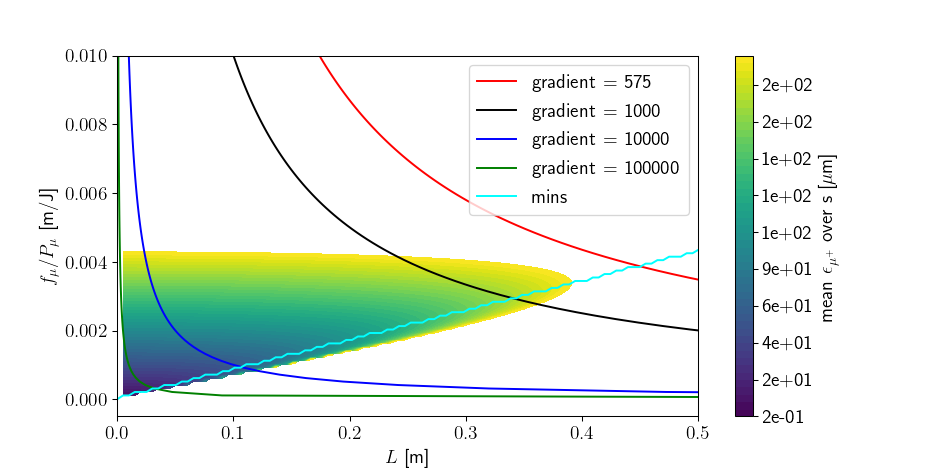

<IPython.core.display.Javascript object>


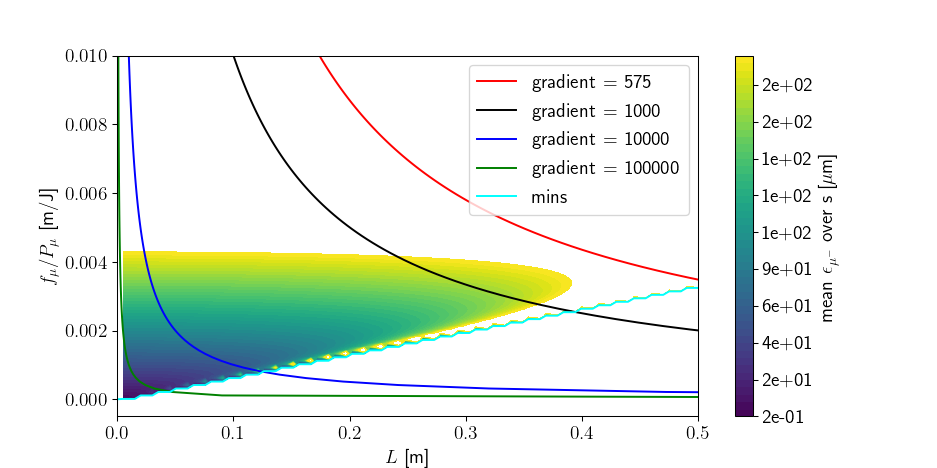

In [203]:
(x, y) = np.meshgrid(L,f)
fig = plt.figure(51)
plt.xlim(right=0.5)  # adjust the right leaving left unchanged
myplot = plt.contourf(x,y,g_mu*epsilon_mu_mean*10**6,levels = g_mu*np.linspace(10**(-3),1)); # multiplied by gamma_mu to get geometric 
plt.plot(L_q1,f, 'r')#levels = g_mu*np.linspace(10**(-3),1)
plt.plot(L_q2,f, 'k')
plt.plot(L_q3,f, 'b')
plt.plot(L_q4,f, 'g')
plt.plot(L_min,f_min, 'cyan')
plt.colorbar(myplot, format='%.0e', label =r'mean $\epsilon_{\mu^+}$ over s [$\mu$m]')
plt.xlabel(r'$L$ [m]')
plt.ylabel(r'$f_\mu/P_\mu$ [m/J]')
plt.legend([r"gradient = 575", r"gradient = 1000",r"gradient = 10000",r"gradient = 100000",r"mins"])

(x, y) = np.meshgrid(L,f)
fig = plt.figure(52)
plt.xlim(right=0.5)  # adjust the right leaving left unchanged
myplot = plt.contourf(x,y,g_mu*epsilon_mum_mean*10**6,levels = g_mu*np.linspace(10**(-3),1)); # multiplied by gamma_mu to get geometric 
plt.plot(L_q1,f, 'r')#levels = g_mu*np.linspace(10**(-3),1)
plt.plot(L_q2,f, 'k')
plt.plot(L_q3,f, 'b')
plt.plot(L_q4,f, 'g')
plt.plot(L_min_m,f_min_m, 'cyan')
plt.colorbar(myplot, format='%.0e', label =r'mean $\epsilon_{\mu^-}$ over s [$\mu$m]')
plt.xlabel(r'$L$ [m]')
plt.ylabel(r'$f_\mu/P_\mu$ [m/J]')
plt.legend([r"gradient = 575", r"gradient = 1000",r"gradient = 10000",r"gradient = 100000",r"mins"])



Now we can plot the minimum emittance in function of the length as well as the appropriate gradients needed to get these emittance in function of the length (we will make the hypothesis that the length of the quadrupoles is half the one of the FODO) 

<IPython.core.display.Javascript object>


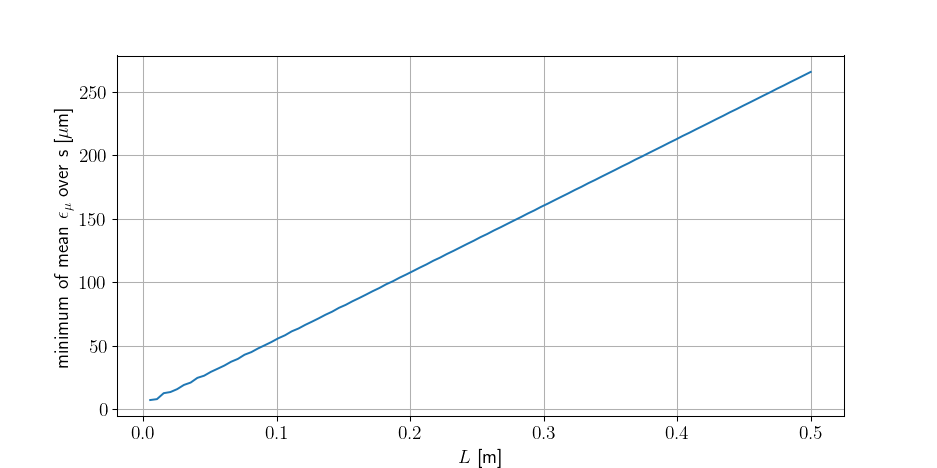

<ipython-input-204-86e45cb5ff17>:8: RuntimeWarning: divide by zero encountered in true_divide
  dB_min = 1/(f_min*(P_mu*10**9/v_c)*(L_min/2))


<IPython.core.display.Javascript object>


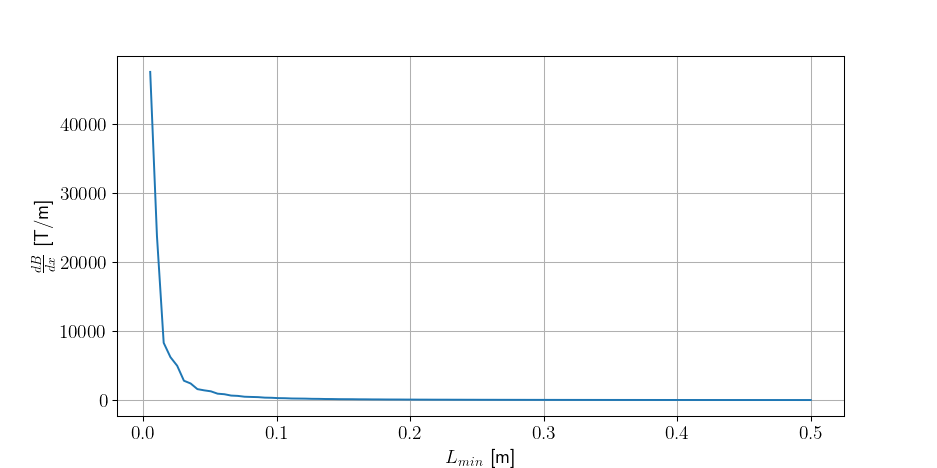

<IPython.core.display.Javascript object>


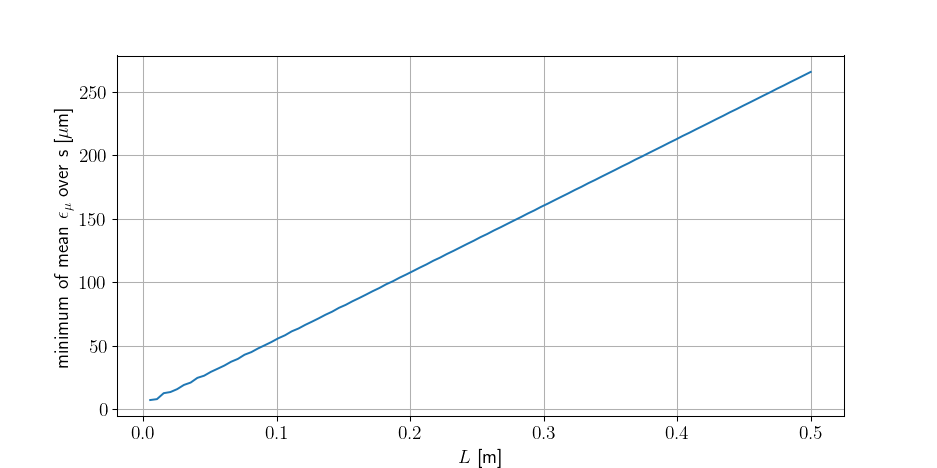

<ipython-input-204-86e45cb5ff17>:23: RuntimeWarning: divide by zero encountered in true_divide
  dB_min = 1/(f_min*(P_mu*10**9/v_c)*(L_min/2))


<IPython.core.display.Javascript object>


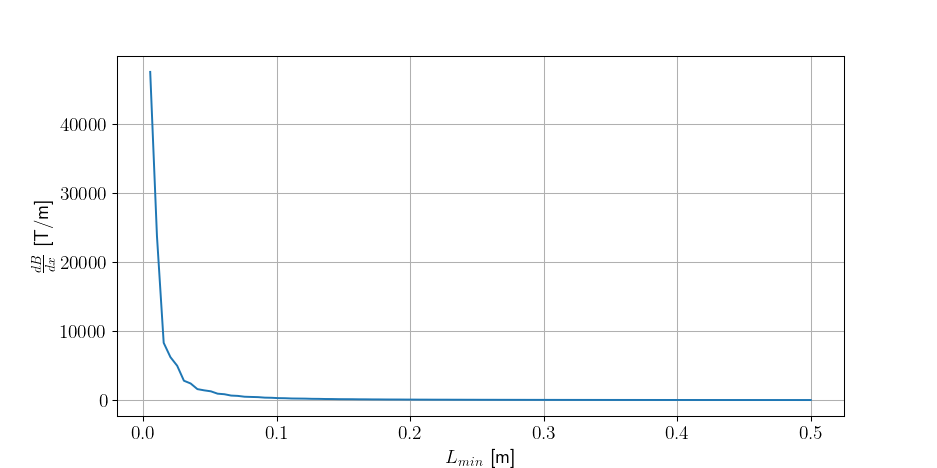

In [204]:
fig = plt.figure(61)
plt.plot(L,epsilon_mu_mean_min*g_mu*10**6)
plt.xlabel(r'$L$ [m]')
plt.ylabel(r'minimum of mean $\epsilon_{\mu}$ over s [$\mu$m]')
plt.grid()

# we have the focal distance and length to get the minima. Taking the hyputhesis given earlier, we can calculate 
dB_min = 1/(f_min*(P_mu*10**9/v_c)*(L_min/2))
fig = plt.figure(62)
plt.plot(L_min,dB_min)
plt.xlabel(r'$L_{min}$ [m]')
plt.ylabel(r'$\frac{dB}{dx}$ [T/m]')
plt.grid()


fig = plt.figure(63)
plt.plot(L,epsilon_mu_mean_min*g_mu*10**6)
plt.xlabel(r'$L$ [m]')
plt.ylabel(r'minimum of mean $\epsilon_{\mu}$ over s [$\mu$m]')
plt.grid()

# we have the focal distance and length to get the minima. Taking the hyputhesis given earlier, we can calculate 
dB_min = 1/(f_min*(P_mu*10**9/v_c)*(L_min/2))
fig = plt.figure(64)
plt.plot(L_min,dB_min)
plt.xlabel(r'$L_{min}$ [m]')
plt.ylabel(r'$\frac{dB}{dx}$ [T/m]')
plt.grid()